In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import torch 
import tensorly as tl
from tensorly import random
import os


import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import torch 
import tensorly as tl
from tensorly import random
import os
import pickle
import modules.dataset_auxiliary as daux
from modules.dataset_auxiliary import *
from modules.classification_auxiliary import *
from modules.ml_auxiliary import *
import copy


# Tensors
import tensorly as tl
from tensorly import random
from tensorly.decomposition import tucker, parafac, partial_tucker
from tensorly.tenalg import mode_dot, multi_mode_dot


# ML
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from IPython.display import clear_output

import xgboost as xgb
import pystmm


/home/s.gostilovich/gesture_progect/gesture_classification/env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload
%autoreload 1
%aimport modules.dataset_auxiliary, modules.classification_auxiliary, modules.ml_auxiliary, modules.bullets, modules.tensor_module


In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import torch 
import tensorly as tl
from tensorly import random
import os
import pickle
# import modules.dataset_auxiliary as daux
# from modules.dataset_auxiliary import *
# from modules.classification_auxiliary import *
# from modules.ml_auxiliary import *
from modules.bullets import*
from modules.classification_auxiliary import *
from modules.ml_auxiliary import *
from modules.tensor_module import *
import copy


In [13]:
input_path = "/mnt/volume-1/04.skgest-bench/input/skgest-mpipe-center.npz"
input_path = r"/mnt/volume-1/05.skgest-bench-center/skgest-smpl-center-fold-P01.npz"
data = load_data(input_path)

In [14]:
data['x_test'].shape

(265, 120, 186)

In [7]:
data_tensor, data_tensor_test = data['x_train'], data['x_test']
tensor_tucker, tensor_tucker_test = get_tucker_tensors(data_tensor, data_tensor_test)

Decomposition with rank: (120, 225). tensor shape: (3895, 120, 225)
Tucker: Rank: (120, 225), rel_error:  0.00000 ; norm origin: 4645.42822265625 ; norm recovered: 4645.38525390625


In [8]:
data_tucker = copy.deepcopy(data)
data_tucker['x_train'] = tensor_tucker
data_tucker['x_test'] = tensor_tucker_test

Logist Regression

In [23]:
# model, predict = regress(data_tucker)
model, predict_ = regress(data)
pred_test_ = evaluate(data,  model)

/home/s.gostilovich/gesture_progect/gesture_classification/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


inference time: 0.20662331581115723


In [53]:
pred_test_

array([35, 42,  3, 13,  4,  4, 23, 15, 20, 22, 30, 22, 33, 37, 28,  3, 43,
       17, 47,  7, 15, 26, 32, 25,  5, 35,  8, 14, 18,  1,  1, 31, 41,  3,
       27, 20, 29,  0, 15, 44, 42, 26,  6, 43, 11, 20, 40, 36, 10, 43, 50,
       33, 40, 50, 33, 29,  5, 21, 11, 46, 41, 37, 34, 53, 33,  3, 15, 48,
       10, 47,  3, 43, 24, 14, 44, 20, 28, 21,  3, 50, 18, 32, 50, 49, 44,
       15, 10, 48, 41,  2, 47, 13, 19,  3,  1, 51, 19, 52, 38,  1, 25, 41,
       42, 25, 38,  3,  3, 51, 13, 45, 23,  8, 31, 11, 35,  2, 34, 46, 37,
       41, 20,  9, 26, 39, 36,  3, 22, 44, 11, 12, 27, 19, 45, 34, 12, 37,
       27, 51, 23, 31, 40,  5, 30, 49, 12,  9, 17, 23, 38, 29, 25, 35,  9,
       11, 45, 35, 39,  7, 52, 31,  5, 39, 13, 33, 22, 10,  6, 49, 32,  1,
       10, 32, 50, 13, 15, 10,  9, 36, 31, 52, 53, 26, 37,  6, 27, 39, 34,
        0, 36,  1, 34, 25, 13, 35,  0, 47, 20,  4, 36, 35, 18, 32, 39, 17,
        6,  0, 20, 30, 31, 15, 24,  8,  0, 36, 41, 43, 48, 36,  9, 36, 13,
        5, 15, 23,  4, 13

In [24]:
print("Acc Train:", accuracy_score(data['y_train'], predict_))
print("Acc Test:", accuracy_score(data['y_test'], pred_test_))

Acc Train: 1.0
Acc Test: 0.9299401197604791


In [21]:
# model, predict = regress(data_tucker)
model, predict_tucker = regress(data_tucker)
pred_test_tucker = evaluate(data_tucker,  model)

inference time: 0.280040979385376


In [22]:

print("Acc Train:", accuracy_score(data_tucker['y_train'], predict_tucker ))
print("Acc Test:", accuracy_score(data_tucker['y_test'], pred_test_tucker ))

Acc Train: 1.0
Acc Test: 0.8862275449101796


In [150]:

acc_list_tucker = []
for i in range(10):
    print('i =', i, '\b: ')
    model, predict_tucker = randforest(data_tucker, seed=None)
    pred_test_tuker = evaluate(data_tucker,  model)
    acc_list_tucker += [accuracy_score(data_tucker['y_test'], pred_test_tuker)]


acc_array_tucker = np.array(acc_list_tucker)
print(f"Acc Test Tucker: mean={100*acc_array_tucker.mean():.2f}, std = {100*acc_array_tucker.std(ddof=1):.2f} ")
print(acc_array_tucker)


i = 0: 
inference time: 0.3284006118774414
i = 1: 
inference time: 0.2560856342315674
i = 2: 
inference time: 0.44791507720947266
i = 3: 
inference time: 0.6258037090301514
i = 4: 
inference time: 0.561206579208374
i = 5: 
inference time: 0.5961010456085205
i = 6: 
inference time: 0.8017876148223877
i = 7: 
inference time: 0.6623015403747559
i = 8: 
inference time: 0.7748501300811768
i = 9: 
inference time: 0.8920044898986816
Acc Test Tucker: mean=95.18, std = 0.31 
[0.95473251 0.95061728 0.95473251 0.94473839 0.9494415  0.95238095
 0.95414462 0.95179306 0.95120517 0.95414462]


In [144]:
model, predicty = randforest(data)
pred_test = evaluate(data,  model)


print("Acc Train:", accuracy_score(data['y_train'], predict))
print("Acc Test:", accuracy_score(data['y_test'], pred_test))


inference time: 0.9033441543579102
Acc Train: 1.0
Acc Test: 0.9453262786596119


In [15]:
classes_dict = get_classes_dict()


In [128]:
print("Acc Train:", accuracy_score(data['y_train'], predict))
print("Acc Test:", accuracy_score(data['y_test'], pred_test))


Acc Train: 1.0
Acc Test: 0.9476778365667254


In [ ]:
0.9441504997060552 - data
0.9129923574368018 - tucker_data - 


In [93]:
classes_dict

{0: 'G01_left_handyes',
 1: 'G02_right_handyes',
 2: 'G03_left_handno',
 3: 'G04_right_handno',
 4: 'G05_left_select',
 5: 'G06_right_select',
 6: 'G07_left_call',
 7: 'G08_right_call',
 8: 'G09_left_mute',
 9: 'G10_right_mute',
 10: 'G11_left_unmute',
 11: 'G12_right_unmute',
 12: 'G13_left_close',
 13: 'G14_right_close',
 14: 'G15_left_wave',
 15: 'G16_right_wave',
 16: 'G17_left_write',
 17: 'G18_right_write',
 18: 'G19_headyes',
 19: 'G20_headno',
 20: 'G21_left_roll',
 21: 'G22_right_roll',
 22: 'G23_left_yaw',
 23: 'G24_right_yaw',
 24: 'G25_left_save',
 25: 'G26_right_save',
 26: 'G27_left_export',
 27: 'G28_right_export',
 28: 'G29_left_pupil',
 29: 'G30_right_pupil',
 30: 'G31_left_swipeup',
 31: 'G32_right_swipeup',
 32: 'G33_left_swipedown',
 33: 'G34_right_swipedown',
 34: 'G35_left_swipeleft',
 35: 'G36_right_swipeleft',
 36: 'G37_left_swiperight',
 37: 'G38_right_swiperight',
 38: 'G39_left_high',
 39: 'G40_right_high',
 40: 'G41_moveforward',
 41: 'G42_movebackward',
 42

In [95]:
pred_test

array([27, 16, 51, 36, 53,  9, 50, 33, 25, 16, 20, 45, 41, 45, 21, 48,  0,
       37,  0,  9, 30, 17, 42, 35, 10, 27,  7, 50, 11, 10, 10, 23, 27, 10,
        0,  3, 46, 28, 44, 19, 32, 19, 14, 47, 18, 13, 25,  2, 20, 47, 27,
        5, 49, 32,  9,  2, 26, 39, 28, 11, 27, 36, 23, 52, 31, 11, 47, 53,
        2, 47, 33,  8, 12,  2, 46, 48, 28, 41,  5, 11, 19, 18,  1, 49, 40,
       43, 20,  9, 36, 53, 26, 10, 11, 28, 11, 52, 51, 28,  7, 47, 27, 42,
       45,  7, 24, 34, 34, 14, 26, 32, 34, 19, 18, 27,  3, 41, 41, 18, 35,
        9, 34, 21, 23, 42, 36, 52, 29, 38, 53, 51, 40, 44, 24, 24, 47, 50,
       19,  2, 16,  5, 11, 16,  9, 26,  5, 39, 36,  0,  6, 18,  1, 20, 21,
       34, 23, 16,  2, 37, 41,  7, 37, 53, 16, 24, 13, 51, 46, 12,  6, 37,
       26, 22, 38, 14, 29, 13, 53, 36, 12, 15, 29, 28, 27, 25, 13,  7, 11,
        5, 28,  6, 31, 33, 27, 23,  4,  2, 24, 11, 51, 18, 14, 43,  5, 47,
       45, 31,  2, 50, 26, 51, 34,  2, 38, 32, 21, 50, 48,  4, 11,  7, 22,
       36, 15, 49, 22, 34

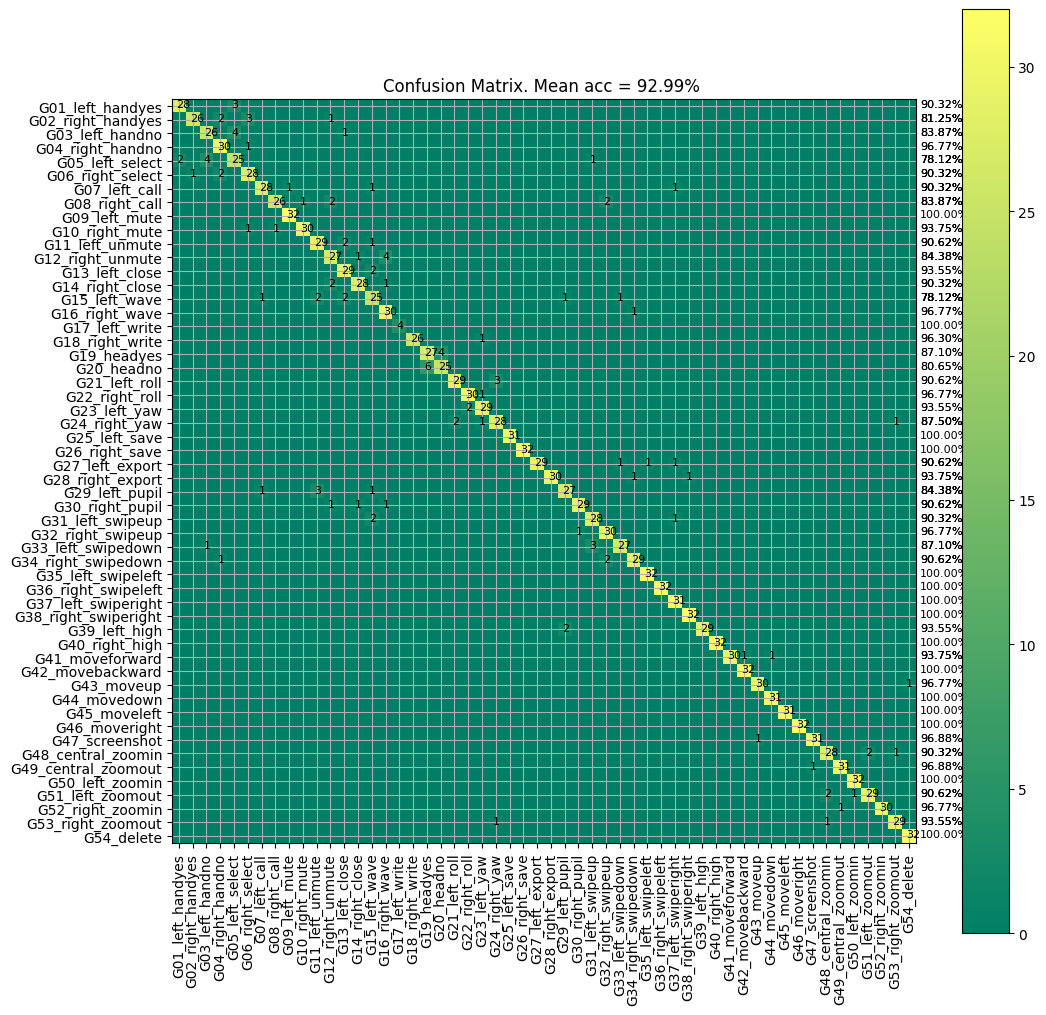

In [52]:
y_true, y_pred = data['y_test'], pred_test_.tolist()

plot_confusion_matrix(y_true, y_pred , classes_dict)
plt.grid()
plt.title(f"Confusion Matrix. Mean acc = {100*accuracy_score(y_true, y_pred):2.2f}% ")
plt.show()

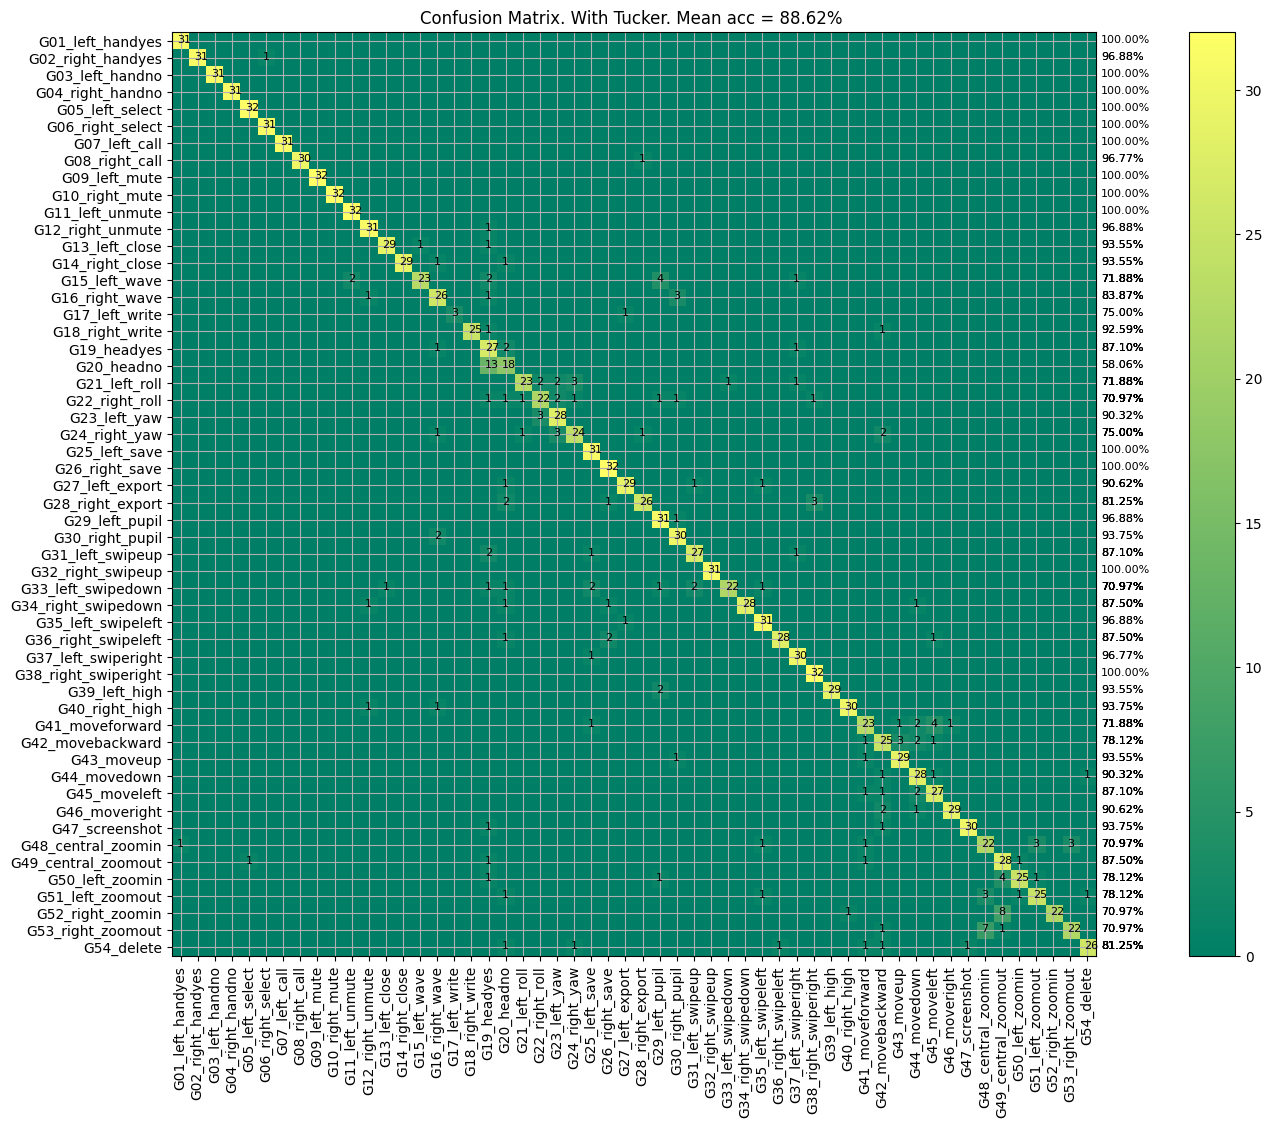

In [51]:
y_true, y_pred = data_tucker['y_test'], pred_test_tucker.tolist()

plot_confusion_matrix(y_true, y_pred , classes_dict, size= (12, 6))
plt.grid()
plt.title(f"Confusion Matrix. With Tucker. Mean acc = {100*accuracy_score(y_true, y_pred):2.2f}% ")
plt.show()

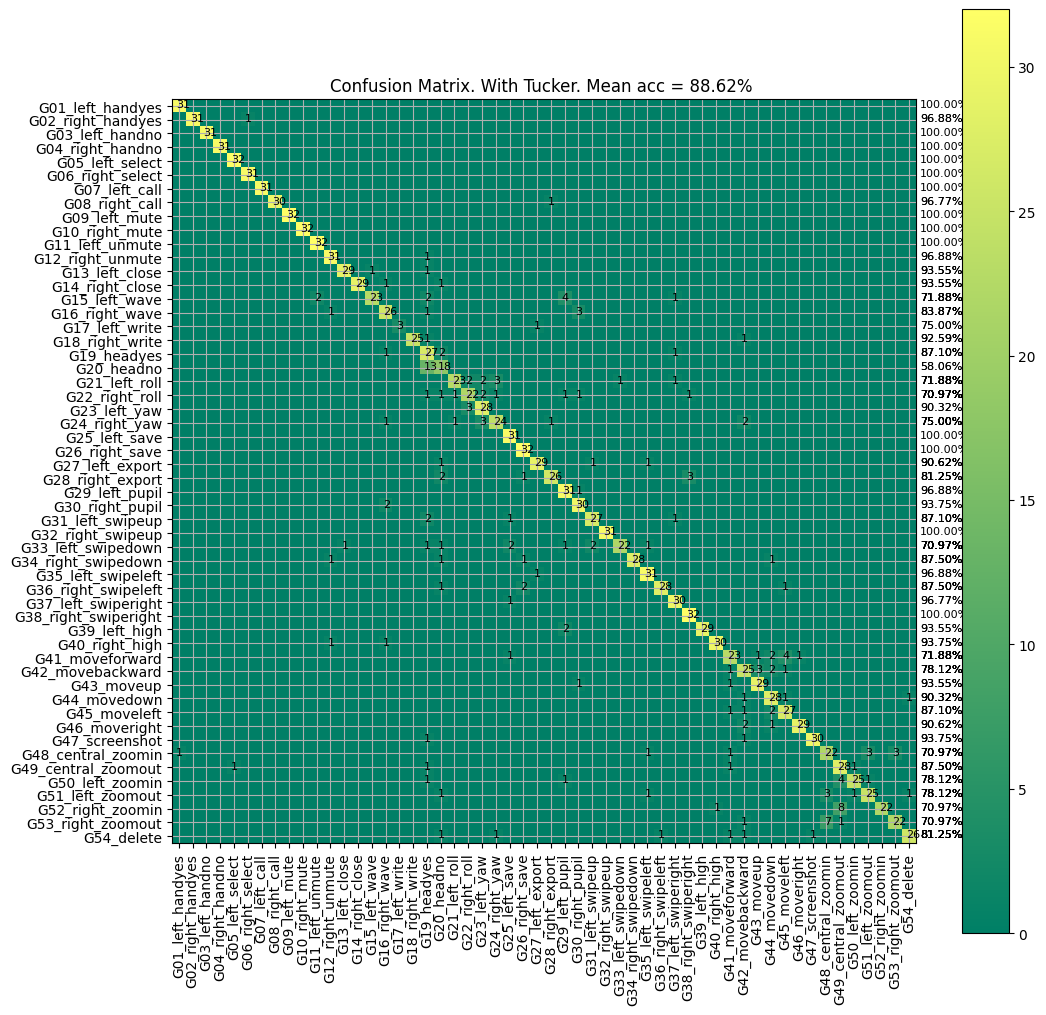

In [48]:
y_true, y_pred = data_tucker['y_test'], pred_test.tolist()
plot_confusion_matrix(y_true, y_pred , classes_dict, size= (6, 6))
plt.grid()
plt.title(f"Confusion Matrix. With Tucker. Mean acc = {100*accuracy_score(y_true, y_pred):2.2f}% ")
plt.show()

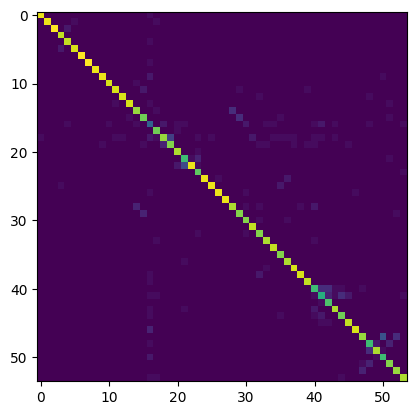

In [52]:
plt.imshow(confusion_matrix(pred_test, data_tucker['y_test']))

In [ ]:
classes = get_classes()

In [ ]:
confusion_matrix()

In [7]:
dataset_path = '../03.skgest-mpipe-slim'

sub_nums = [i for i in range(1,3)]
g_nums = [i for i in range(22,25)]
trials = [i for i in range(1,3)]
cams = [i for i in range(1,2)]



ds_dict = form_partial_ds_dict(dataset_path, sub_nums, g_nums, trials, cams)






ds_dict was inisialized!


In [8]:
df = ds_dict['P01G23T01C01']['sk']
df = df[df.columns[df.columns.str.match('joint__[l].*')]]
df

,joint__left_hand__wrist__x,joint__left_hand__wrist__y,joint__left_hand__wrist__z,joint__left_hand__thumb_cmc__x,joint__left_hand__thumb_cmc__y,joint__left_hand__thumb_cmc__z,joint__left_hand__thumb_mcp__x,joint__left_hand__thumb_mcp__y,joint__left_hand__thumb_mcp__z,joint__left_hand__thumb_ip__x,...,joint__left_hand__pinky_mcp__z,joint__left_hand__pinky_pip__x,joint__left_hand__pinky_pip__y,joint__left_hand__pinky_pip__z,joint__left_hand__pinky_dip__x,joint__left_hand__pinky_dip__y,joint__left_hand__pinky_dip__z,joint__left_hand__pinky_tip__x,joint__left_hand__pinky_tip__y,joint__left_hand__pinky_tip__z
0,0.5440,0.8239,0.0,0.5348,0.8341,-0.0016,0.5307,0.8498,-0.0023,0.5303,...,-0.0001,0.5493,0.8730,0.0003,0.5456,0.8775,0.0016,0.5429,0.8779,0.0026
1,0.5440,0.8240,0.0,0.5346,0.8337,-0.0016,0.5305,0.8498,-0.0022,0.5301,...,0.0002,0.5496,0.8732,0.0007,0.5459,0.8772,0.0020,0.5433,0.8772,0.0031
2,0.5437,0.8242,0.0,0.5345,0.8340,-0.0017,0.5304,0.8499,-0.0026,0.5299,...,-0.0004,0.5494,0.8735,-0.0003,0.5456,0.8773,0.0010,0.5431,0.8771,0.0021
3,0.5437,0.8242,0.0,0.5344,0.8334,-0.0020,0.5303,0.8492,-0.0028,0.5297,...,0.0004,0.5490,0.8734,0.0007,0.5453,0.8769,0.0020,0.5430,0.8765,0.0031
4,0.5433,0.8245,0.0,0.5338,0.8336,-0.0016,0.5297,0.8498,-0.0023,0.5292,...,-0.0004,0.5485,0.8747,-0.0002,0.5446,0.8781,0.0012,0.5422,0.8775,0.0024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.5422,0.8234,0.0,0.5329,0.8319,-0.0015,0.5285,0.8481,-0.0021,0.5280,...,-0.0004,0.5474,0.8726,-0.0003,0.5437,0.8764,0.0010,0.5413,0.8766,0.0020
117,0.5419,0.8237,0.0,0.5326,0.8326,-0.0014,0.5282,0.8483,-0.0019,0.5277,...,-0.0003,0.5473,0.8724,-0.0001,0.5438,0.8759,0.0013,0.5415,0.8759,0.0024
118,0.5418,0.8238,0.0,0.5325,0.8324,-0.0014,0.5282,0.8482,-0.0019,0.5276,...,-0.0005,0.5471,0.8726,-0.0003,0.5436,0.8765,0.0009,0.5411,0.8770,0.0020
119,0.5418,0.8238,0.0,0.5325,0.8322,-0.0017,0.5281,0.8482,-0.0024,0.5276,...,-0.0005,0.5470,0.8728,-0.0005,0.5434,0.8765,0.0008,0.5409,0.8767,0.0018


In [15]:
df.index[df.isna().sum(axis=1) == 21]

Int64Index([67, 69], dtype='int64')

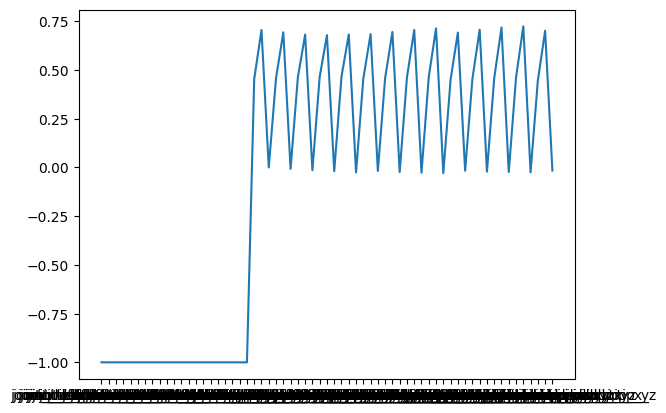

In [21]:
plt.plot(df.loc[67, :].fillna(-1))

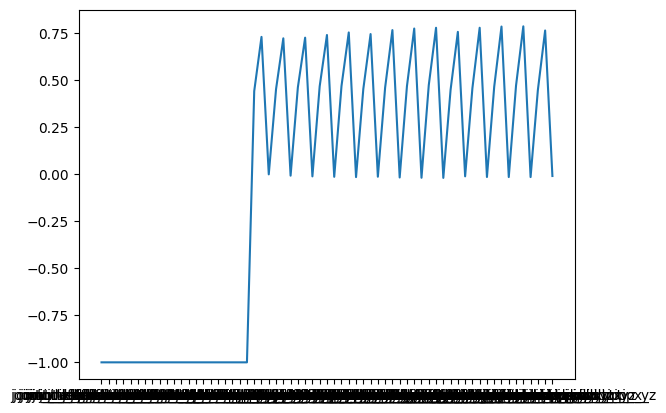

In [22]:
plt.plot(df.loc[69, :].fillna(-1))

In [24]:
df.columns[0:24]

Index(['joint__left_hand__wrist__x', 'joint__left_hand__wrist__y',
       'joint__left_hand__wrist__z', 'joint__left_hand__thumb_cmc__x',
       'joint__left_hand__thumb_cmc__y', 'joint__left_hand__thumb_cmc__z',
       'joint__left_hand__thumb_mcp__x', 'joint__left_hand__thumb_mcp__y',
       'joint__left_hand__thumb_mcp__z', 'joint__left_hand__thumb_ip__x',
       'joint__left_hand__thumb_ip__y', 'joint__left_hand__thumb_ip__z',
       'joint__left_hand__thumb_tip__x', 'joint__left_hand__thumb_tip__y',
       'joint__left_hand__thumb_tip__z',
       'joint__left_hand__index_finger_mcp__x',
       'joint__left_hand__index_finger_mcp__y',
       'joint__left_hand__index_finger_mcp__z',
       'joint__left_hand__index_finger_pip__x',
       'joint__left_hand__index_finger_pip__y',
       'joint__left_hand__index_finger_pip__z',
       'joint__left_hand__index_finger_dip__x',
       'joint__left_hand__index_finger_dip__y',
       'joint__left_hand__index_finger_dip__z'],
      dtype='obj

<AxesSubplot:>

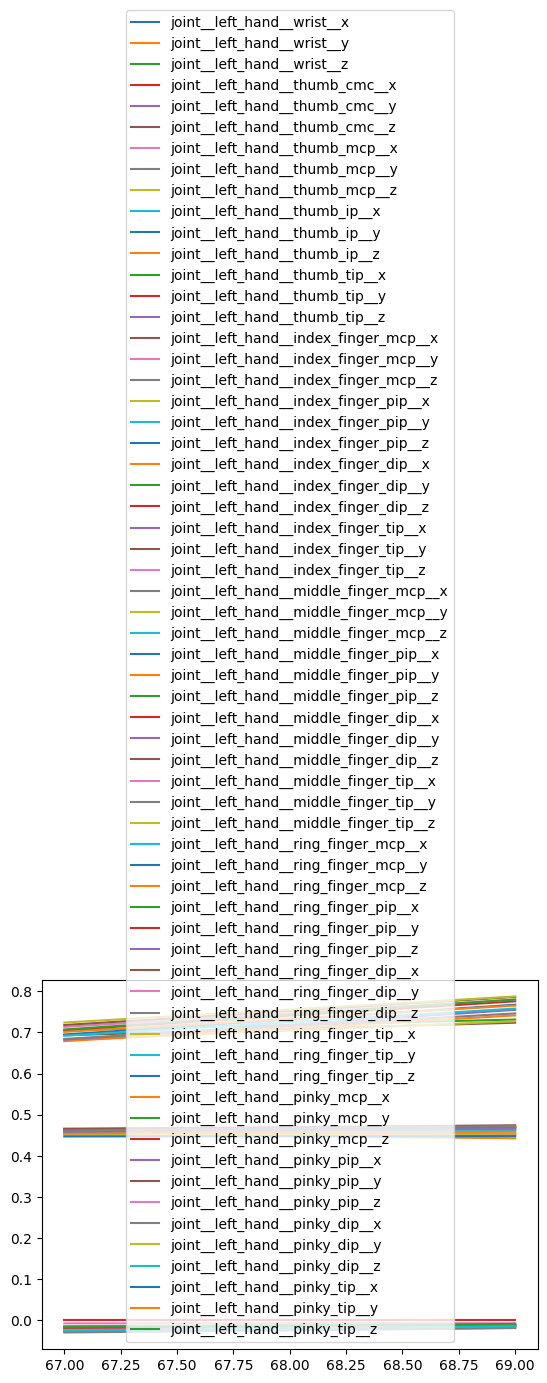

In [17]:
df.loc[[67, 69]].plot()

In [11]:
print(list(ds_dict['P01G23T01C01']['sk'])

['joint__body__nose__x', 'joint__body__nose__y', 'joint__body__nose__z', 'joint__body__left_eye_inner__x', 'joint__body__left_eye_inner__y', 'joint__body__left_eye_inner__z', 'joint__body__left_eye__x', 'joint__body__left_eye__y', 'joint__body__left_eye__z', 'joint__body__left_eye_outer__x', 'joint__body__left_eye_outer__y', 'joint__body__left_eye_outer__z', 'joint__body__right_eye_inner__x', 'joint__body__right_eye_inner__y', 'joint__body__right_eye_inner__z', 'joint__body__right_eye__x', 'joint__body__right_eye__y', 'joint__body__right_eye__z', 'joint__body__right_eye_outer__x', 'joint__body__right_eye_outer__y', 'joint__body__right_eye_outer__z', 'joint__body__left_ear__x', 'joint__body__left_ear__y', 'joint__body__left_ear__z', 'joint__body__right_ear__x', 'joint__body__right_ear__y', 'joint__body__right_ear__z', 'joint__body__mouth_left__x', 'joint__body__mouth_left__y', 'joint__body__mouth_left__z', 'joint__body__mouth_right__x', 'joint__body__mouth_right__y', 'joint__body__mouth

In [6]:
SK_KEY = 'sk'

def form_full_ds_dict(dataset_path, dataset_type='codedflat'):
    if dataset_type == 'codedflat':
        ds_dict = _form_full_ds_dict_from_codedflat(dataset_path)
    else:
        f"Error! dataset_type={dataset_type} is not implemented!"
        ds_dict = None
    return ds_dict


def form_partial_ds_dict(dataset_path, subs, gestures,  trials,  cams=[1], dataset_type='codedflat', ds_dict=None):
    if dataset_type == 'codedflat':
        ds_dict = _form_partial_ds_dict_from_codedflat(dataset_path, sub_nums=subs, g_nums=gestures,
                                                    trials=trials,  cams=cams, ds_dict=ds_dict)
    else:
        f"Error! dataset_type={dataset_type} is not implemented!"
        ds_dict = None
    return ds_dict
    

def _form_full_ds_dict_from_codedflat(dataset_path):
    print("Warinig! codedflat dataset is not implimented yet!")
    return None

def _form_partial_ds_dict_from_codedflat(dataset_path, sub_nums, g_nums,  trials,  cams, ds_dict=None):
    # print("Warinig! codedflat dataset is not implimented yet!")
    file_ext = '.csv'
    sub_codes = [f'P{sub:02d}' for sub in sub_nums]
    g_codes = [f'G{g_num:02d}' for g_num in g_nums]
    trial_codes = [f'T{trial:02d}' for trial in trials]
    cam_codes = [f'C{trial:02d}' for trial in trials]
    g_ids = [sub_code + g_code + trial_code + cam_code for sub_code in sub_codes
                                                                        for g_code in g_codes
                                                                        for trial_code in trial_codes
                                                                        for cam_code in cam_codes]
    
    if ds_dict is None:
        ds_dict = {}
        print('ds_dict was inisialized!')
    else:
        print('ds_dict will be updated!')
    
    for g_id in g_ids:
        data_file_path = os.path.join(dataset_path, g_id + file_ext) 
        df = pd.read_csv(data_file_path)
        if g_id not in ds_dict.keys():
            ds_dict[g_id] = {}
        ds_dict[g_id][SK_KEY] = df
    
    return ds_dict
    

In [6]:
files

['P01G01T01C01.csv',
 'P01G01T01C02.csv',
 'P01G01T02C01.csv',
 'P01G01T02C02.csv',
 'P01G02T01C01.csv',
 'P01G02T01C02.csv',
 'P01G02T02C01.csv',
 'P01G02T02C02.csv',
 'P02G01T01C01.csv',
 'P02G01T01C02.csv',
 'P02G01T02C01.csv',
 'P02G01T02C02.csv',
 'P02G02T01C01.csv',
 'P02G02T01C02.csv',
 'P02G02T02C01.csv',
 'P02G02T02C02.csv']